In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
"""import tweepy

consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)"""

"import tweepy\n\nconsumer_key = 'YOUR CONSUMER KEY'\nconsumer_secret = 'YOUR CONSUMER SECRET'\naccess_token = 'YOUR ACCESS TOKEN'\naccess_secret = 'YOUR ACCESS SECRET'\n\nauth = tweepy.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth)"

Gathering

In [3]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )
tweet_json=pd.read_json("tweet-json copy",lines=True,encoding='utf-8')

Assening
1) Keep original ratings (no retweets) that have images

In [4]:
print(sum(pd.isnull(twitter_archive['retweeted_status_user_id']).value_counts()))


2356


2) 'timestamp' col is string not datetime


In [5]:
print(type(twitter_archive['timestamp'][0]))


<class 'str'>


3) ['name', 'doggo', 'floofer', 'pupper', 'puppo'] col with missing values


In [6]:
col_missing_value=[]
for col in twitter_archive.columns:
    if('None' in list(twitter_archive[col].values)):
        col_missing_value.append(col)
print(col_missing_value)        

['name', 'doggo', 'floofer', 'pupper', 'puppo']


4) 'rating_denominator' have values greater than 10

In [7]:
for v in twitter_archive['rating_denominator'].values:
    if(v>10):
        print("incorrect value in this col")
        break


incorrect value in this col


5) 'rating_numerator' is integer and it should be float


In [8]:
print(type(twitter_archive['rating_numerator'][0]))

<class 'numpy.int64'>


6) columns ('retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp') won't be used for analysis



In [9]:
li_twitter_archive=[]
for col in twitter_archive.columns:
    if("retweet" in col):
        li_twitter_archive.append(col)
print(li_twitter_archive)        

['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']


7) "jpg_url" has 66 duplicated values



In [10]:
c=0
for v in image_prediction["jpg_url"].duplicated().values:
    if(v):
     c=c+1
print(c)    

66


8) column id has name different than 2 data set

In [11]:
print(twitter_archive.columns)
print(image_prediction.columns)
print(tweet_json.columns)


Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')
Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')
Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_coun

Tidiness

1) 'doggo', 'floofer', 'pupper', 'puppo' it's about dog personality


In [12]:
# handle none
twitter_archive.doggo.replace('None', '', inplace=True)
twitter_archive.floofer.replace('None', '', inplace=True)
twitter_archive.pupper.replace('None', '', inplace=True)
twitter_archive.puppo.replace('None', '', inplace=True)

# merge into column
twitter_archive['dog_personality'] = twitter_archive.doggo + twitter_archive.floofer + twitter_archive.pupper + twitter_archive.puppo

# handle multiple stages
twitter_archive.loc[twitter_archive.dog_personality == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive.loc[twitter_archive.dog_personality == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive.loc[twitter_archive.dog_personality == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
twitter_archive.loc[twitter_archive.dog_personality == '', 'dog_personality'] = np.nan

In [13]:
'''
li_dog_personality=[]
for i in range(len(twitter_archive)):
    if(twitter_archive['doggo'][i] != 'None'):
        li_dog_personality.append('doggo')
    elif(twitter_archive['floofer'][i] != 'None'):
        li_dog_personality.append('floofer')
    elif (twitter_archive['pupper'][i] != 'None'):
        li_dog_personality.append('pupper')
    elif (twitter_archive['puppo'][i] != 'None'):
        li_dog_personality.append('puppo')
    else:
        li_dog_personality.append('None')

twitter_archive['dog_personality']=pd.DataFrame(li_dog_personality)
twitter_archive.pop('doggo')
twitter_archive.pop('floofer')
twitter_archive.pop('pupper')
twitter_archive.pop('puppo')

'''

"\nli_dog_personality=[]\nfor i in range(len(twitter_archive)):\n    if(twitter_archive['doggo'][i] != 'None'):\n        li_dog_personality.append('doggo')\n    elif(twitter_archive['floofer'][i] != 'None'):\n        li_dog_personality.append('floofer')\n    elif (twitter_archive['pupper'][i] != 'None'):\n        li_dog_personality.append('pupper')\n    elif (twitter_archive['puppo'][i] != 'None'):\n        li_dog_personality.append('puppo')\n    else:\n        li_dog_personality.append('None')\n\ntwitter_archive['dog_personality']=pd.DataFrame(li_dog_personality)\ntwitter_archive.pop('doggo')\ntwitter_archive.pop('floofer')\ntwitter_archive.pop('pupper')\ntwitter_archive.pop('puppo')\n\n"

Test


In [14]:
print(twitter_archive.columns)

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'dog_personality', 'dog_stage'],
      dtype='object')


2) we need from json only id , retweet_count , favorite_count


In [15]:
for col in tweet_json.columns:
    if(col!='id' and col!='retweet_count'and col!='favorite_count' ):
        tweet_json.pop(col)


Test


In [16]:
print(tweet_json.columns)

Index(['favorite_count', 'id', 'retweet_count'], dtype='object')


Clean

In [17]:
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

Define 

keep all null rows in col 'retweeted_status_user_id' by using pd.isnull

remove all non null rows

Code

In [18]:
#1
twitter_archive_clean=twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]



Test

In [19]:
print(sum(pd.isnull(twitter_archive_clean['retweeted_status_user_id']).value_counts())-len(twitter_archive_clean))


0


Define 

convert col 'timestamp' to date time  as a data type 

Code

In [20]:
#2
twitter_archive_clean['timestamp']= pd.to_datetime(twitter_archive_clean['timestamp'])


Test

In [21]:
print(type(twitter_archive_clean['timestamp'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Define 

delete all None rows in col ‘name’ and ‘dog_personality’

Code

In [22]:
#3
twitter_archive_clean=twitter_archive_clean[(twitter_archive_clean[col_missing_value[0]] != "None")]
twitter_archive_clean=twitter_archive_clean[(twitter_archive_clean['dog_personality'] != np.nan)]



Test


In [23]:
print(twitter_archive_clean[col_missing_value[0]].value_counts())
print(twitter_archive_clean['dog_personality'].value_counts())

a          55
Charlie    11
Lucy       11
Cooper     10
Oliver     10
Tucker      9
Penny       9
Winston     8
Sadie       8
the         8
Lola        8
Daisy       7
Toby        7
Jax         6
Oscar       6
an          6
Stanley     6
Bella       6
Koda        6
Bailey      6
Bo          6
Leo         5
Rusty       5
Buddy       5
Chester     5
Scout       5
Milo        5
Bentley     5
Dave        5
Louis       5
           ..
Rey         1
Beebop      1
Kallie      1
Tito        1
Rumble      1
Norman      1
Koko        1
Lacy        1
Malikai     1
Dawn        1
Herb        1
Miley       1
all         1
Mabel       1
Ralphy      1
Tanner      1
Kaiya       1
Bubba       1
Eugene      1
Jeffri      1
Kobe        1
Kial        1
Lugan       1
Amy         1
Hurley      1
Brooks      1
Spark       1
Tuck        1
Lilly       1
Rodney      1
Name: name, Length: 955, dtype: int64
pupper         132
doggo           40
puppo           16
floofer          5
doggopupper      5
Name: dog_per

Define

delete all  values in col 'rating_denominator' that greater than 10

Code

In [24]:
#4
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean['rating_denominator']<=10]


Test

In [25]:
print(max(twitter_archive_clean['rating_denominator']))

10


Define 

convert col 'rating_numerator' to float as a data type

Code

In [26]:
#5
twitter_archive_clean['rating_numerator']=twitter_archive_clean['rating_numerator'].astype(float)


Test

In [27]:
print(type(twitter_archive_clean['rating_numerator'][9]))

<class 'numpy.float64'>


Define 

remove all retweet col that won’t be used 

Code

In [28]:
#6
for l in li_twitter_archive:
    twitter_archive_clean.pop(l)


Test

In [29]:
print(twitter_archive_clean.columns)

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'dog_personality', 'dog_stage'],
      dtype='object')


Define

remove all duplicate jpg_url

Code

In [30]:
#7
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last')


Test

In [31]:
c=0
for v in image_prediction_clean["jpg_url"].duplicated().values:
    if(v):
     c=c+1
print(c)    

0


Define

convert id col to tweet id to use it for merge 

Code

In [32]:
#8
tweet_json_clean["tweet_id"] = tweet_json_clean["id"]
tweet_json_clean.pop("id")


0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
5       891087950875897856
6       890971913173991426
7       890729181411237888
8       890609185150312448
9       890240255349198849
10      890006608113172480
11      889880896479866881
12      889665388333682689
13      889638837579907072
14      889531135344209921
15      889278841981685760
16      888917238123831296
17      888804989199671297
18      888554962724278272
19      888078434458587136
20      887705289381826560
21      887517139158093824
22      887473957103951883
23      887343217045368832
24      887101392804085760
25      886983233522544640
26      886736880519319552
27      886680336477933568
28      886366144734445568
29      886267009285017600
               ...        
2324    666411507551481857
2325    666407126856765440
2326    666396247373291520
2327    666373753744588802
2328    666362758909284353
2329    666353288456101888
2

Test

In [33]:
print(tweet_json_clean.columns)

Index(['favorite_count', 'retweet_count', 'tweet_id'], dtype='object')


tidiness

3) All tables should be part of one dataset

Code



In [34]:
twitter_archive_clean['rating']=twitter_archive_clean['rating_numerator']/twitter_archive_clean['rating_denominator']


Test

In [35]:
twitter_archive_clean['rating']

0       1.3
1       1.3
2       1.2
3       1.3
4       1.2
6       1.3
8       1.3
9       1.4
10      1.3
11      1.3
13      1.2
14      1.3
15      1.3
16      1.2
17      1.3
18      1.3
20      1.2
21      1.3
22      1.4
23      1.3
26      1.3
27      1.3
28      1.3
29      1.2
31      1.3
33      1.2
34      1.3
38      1.2
39      1.3
40      1.3
       ... 
2297    1.0
2300    1.0
2302    0.9
2303    1.0
2304    1.1
2308    0.9
2309    0.8
2311    1.0
2312    0.5
2313    1.0
2314    0.8
2315    0.8
2317    0.9
2318    1.0
2319    0.9
2325    1.0
2326    0.2
2327    0.7
2333    0.9
2334    0.3
2335    0.5
2345    1.0
2346    0.8
2347    0.9
2348    1.0
2349    0.2
2350    1.0
2352    0.6
2353    0.9
2354    0.7
Name: rating, Length: 1491, dtype: float64

In [36]:
df_twitter = pd.merge(tweet_json_clean,image_prediction_clean, how = 'left', on = ['tweet_id'])
df_twitter = pd.merge(twitter_archive_clean,df_twitter, how = 'left', on = ['tweet_id'])
print(df_twitter.columns)

df_twitter.to_csv('twitter_archive_master.csv')
twitter_archive_clean.to_csv('clean_twitter_archive.csv')
image_prediction_clean.to_csv('clean_image_prediction.csv')
tweet_json_clean.to_csv('clean_twitter_api.csv')


Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'dog_personality', 'dog_stage', 'rating', 'favorite_count',
       'retweet_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')


visualizations

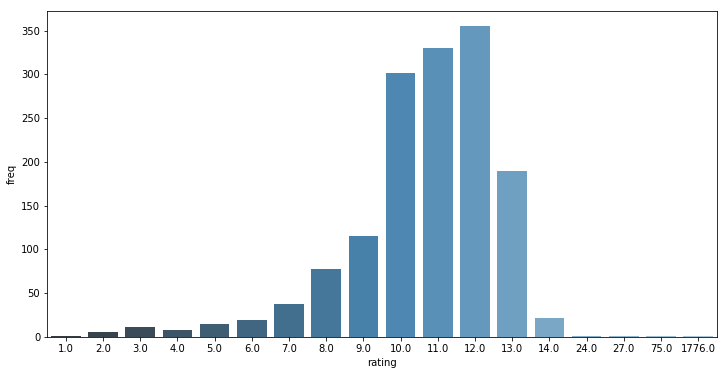

In [37]:
pf=df_twitter.rating_numerator.value_counts()
x=pf.index
y=pf.values
fig,ax=plt.subplots(figsize=(12,6))
h=sns.barplot(x,y,palette="Blues_d",ax=ax)
ax.set(xlabel="rating",ylabel="freq")
plt.show()
fig.savefig('outputt1.png',bbox_inches='tight');

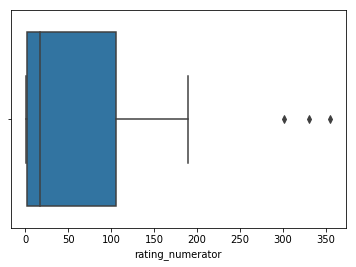

In [38]:
pf2=df_twitter.rating_numerator.value_counts()
ax=sns.boxplot(pf2)
fig = plt.gcf()
plt.show()
fig.savefig('outputt2.png',bbox_inches='tight');

In [39]:
demo=df_twitter[df_twitter.rating_numerator>10]
demo

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
6,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,...,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
7,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,...,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
8,890006608113172480,NaN,NaN,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13.0,10,Koda,...,1.0,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True
9,889880896479866881,NaN,NaN,2017-07-25 16:11:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,13.0,10,Bruno,...,1.0,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False


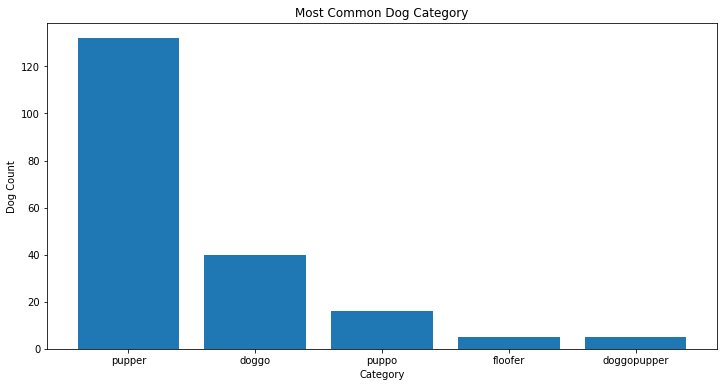

pupper          245
doggo            83
puppo            29
doggopupper      12
floofer           9
doggopuppo        1
doggofloofer      1
Name: dog_personality, dtype: int64


In [40]:
w=df_twitter.dog_personality.value_counts()
fig,ax = plt.subplots(figsize = (12,6))
ax.bar(w.index[:], w.values[:], width = 0.8)
ax.set_ylabel('Dog Count')
ax.set_xlabel('Category')
plt.title("Most Common Dog Category")
plt.show()
fig.savefig('outputt3.png',bbox_inches='tight');
print(twitter_archive.dog_personality.value_counts())

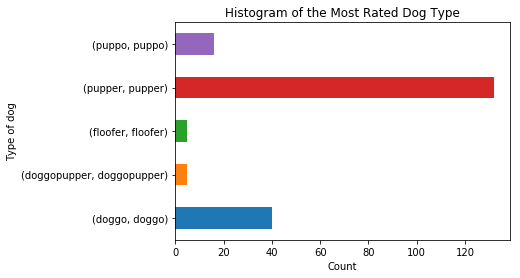

In [41]:
df_dog_type = df_twitter.groupby('dog_personality')
df_dog_type['dog_personality'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('outputt4.png',bbox_inches='tight');

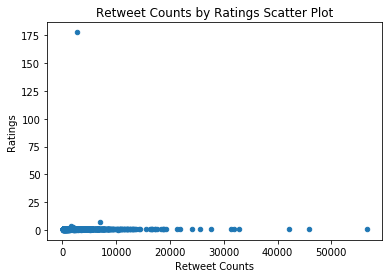

In [42]:
df_twitter.plot(x='retweet_count', y='rating', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot')

fig = plt.gcf()
fig.savefig('outputt5.png',bbox_inches='tight');